In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [32]:
path = "/Users/sethfried/Fantasy Football/Cleaned Data/Player_Combines/"
all_combine_df = pd.DataFrame()

for year in range(2006, 2025):
    file_path = f"{path}combine_{year}.csv"
    df = pd.read_csv(file_path)
    df['Year'] = year
    all_combine_df = pd.concat([all_combine_df, df], ignore_index=True)
    


def convert_height_to_inches(ht_str):
    try:
        feet, inches = map(int, ht_str.split('-'))
        return feet * 12 + inches
    except (ValueError, AttributeError):
        return None

all_combine_df['Ht_in'] = all_combine_df['Ht'].apply(convert_height_to_inches)
all_combine_df[['Team', 'Round', 'Pick', 'Year_Draft']] = all_combine_df['Drafted (tm/rnd/yr)'].str.split('/', n=3, expand=True)

all_combine_df['Team'] = all_combine_df['Team'].str.strip()
all_combine_df['Round'] = all_combine_df['Round'].str.strip()
all_combine_df['Pick'] = all_combine_df['Pick'].str.strip()
all_combine_df['Year_Draft'] = all_combine_df['Year_Draft'].str.strip()
all_combine_df['Round'] = all_combine_df['Round'].str.extract(r'(\d+)').astype('Int64')
all_combine_df['Pick'] = all_combine_df['Pick'].str.extract(r'(\d+)').astype('Int64')
all_combine_df = all_combine_df.rename(columns = {'Pos':'POS'})

all_combine_df = all_combine_df.drop(columns=['Drafted (tm/rnd/yr)'])
all_combine_df = all_combine_df.dropna()
print(all_combine_df.head())
print(f"\nTotal rows in combined DataFrame: {len(all_combine_df)}")
print(f"Total columns in combined DataFrame: {all_combine_df.shape[1]}")


            Player POS      School        College    Ht     Wt  40yd  \
0     Joseph Addai  RB         LSU  College Stats  5-11  214.0  4.40   
11   Brian Calhoun  RB   Wisconsin  College Stats   5-9  201.0  4.57   
16    Owen Daniels  TE   Wisconsin  College Stats   6-3  253.0  4.65   
17    Vernon Davis  TE    Maryland  College Stats   6-3  254.0  4.38   
18  Anthony Fasano  TE  Notre Dame  College Stats   6-4  259.0  4.72   

    Vertical  Bench  Broad Jump  3Cone  Shuttle  Year  Ht_in  \
0       38.5   18.0       125.0   7.09     4.47  2006   71.0   
11      31.5   18.0       124.0   7.05     4.20  2006   69.0   
16      34.5   23.0       114.0   6.87     4.10  2006   75.0   
17      42.0   33.0       128.0   7.00     4.17  2006   75.0   
18      33.5   19.0       112.0   6.94     4.34  2006   76.0   

                   Team  Round  Pick Year_Draft  
0    Indianapolis Colts      1    30       2006  
11        Detroit Lions      3    74       2006  
16       Houston Texans      4  

In [33]:
pos = ["qb", "rb", "te", "wr"]
dfs = []

for position in pos:
    try:
        df = pd.read_csv(f"/Users/sethfried/Fantasy Football/Cleaned Data/Player_Season_stats/{position}_season_stats")
        df["POS"] = position.upper()
        dfs.append(df)
    except FileNotFoundError:
        print(f"File not found for position {position}. Please check the stats file path.")
        continue

stats_df = pd.concat(dfs, ignore_index=True)
stats_df = stats_df.fillna(0)
stats_df = stats_df.dropna()
stats_df = stats_df.drop_duplicates()
stats_df = stats_df.rename(columns={"Year_x": "Year"})
print(stats_df.columns)
print(stats_df.head())


Index(['Player', 'Year', 'Team', 'games', 'pass_att', 'pass_cmp', 'pass_yds',
       'pass_td', 'pass_int', 'rush_att', 'rush_yds', 'rush_td', 'fumbles',
       'avg_off_rank', 'avg_def_rank', 'team_pass_att', 'team_pass_yds',
       'team_rush_att', 'team_tot_off', 'pass_yds_adj', 'rush_yds_adj',
       'pass_att_pg', 'pass_cmp_pg', 'pass_yds_pg', 'pass_td_pg',
       'pass_int_pg', 'rush_att_pg', 'rush_yds_pg', 'rush_td_pg', 'fumbles_pg',
       'pass_yds_adj_pg', 'rush_yds_adj_pg', 'pct_q', 'pct_ir', 'pct_p',
       'pct_d', 'pct_o', 'pct_s', 'pass_share', 'depth_rank', 'POS', 'rec',
       'rec_yds', 'rec_td', 'rec_yds_adj', 'rec_pg', 'rec_yds_pg',
       'rec_yds_adj_pg', 'rush_share', 'rec_tgt', 'rec_ctch_pct', 'rec_yptgt',
       'rush_ypc', 'rec_tgt_pg', 'rec_td_pg', 'rec_share'],
      dtype='object')
          Player  Year Team  games  pass_att  pass_cmp  pass_yds  pass_td  \
0    A.J. Feeley  2006  PHI     16      38.0      26.0     342.0      3.0   
1    A.J. Feeley  2007  

In [34]:
merged_df = pd.merge(stats_df, all_combine_df, on=['Player', 'POS'], how='inner')
merged_df = merged_df.rename(columns = {'Year_x':'Year','Team_x':'Team'})
merged_df = merged_df.drop(['Team_y','Year_y'], axis = 1)
print(merged_df.columns)
print(merged_df.head())


Index(['Player', 'Year', 'Team', 'games', 'pass_att', 'pass_cmp', 'pass_yds',
       'pass_td', 'pass_int', 'rush_att', 'rush_yds', 'rush_td', 'fumbles',
       'avg_off_rank', 'avg_def_rank', 'team_pass_att', 'team_pass_yds',
       'team_rush_att', 'team_tot_off', 'pass_yds_adj', 'rush_yds_adj',
       'pass_att_pg', 'pass_cmp_pg', 'pass_yds_pg', 'pass_td_pg',
       'pass_int_pg', 'rush_att_pg', 'rush_yds_pg', 'rush_td_pg', 'fumbles_pg',
       'pass_yds_adj_pg', 'rush_yds_adj_pg', 'pct_q', 'pct_ir', 'pct_p',
       'pct_d', 'pct_o', 'pct_s', 'pass_share', 'depth_rank', 'POS', 'rec',
       'rec_yds', 'rec_td', 'rec_yds_adj', 'rec_pg', 'rec_yds_pg',
       'rec_yds_adj_pg', 'rush_share', 'rec_tgt', 'rec_ctch_pct', 'rec_yptgt',
       'rush_ypc', 'rec_tgt_pg', 'rec_td_pg', 'rec_share', 'School', 'College',
       'Ht', 'Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone',
       'Shuttle', 'Ht_in', 'Round', 'Pick', 'Year_Draft'],
      dtype='object')
             Player  Year Te

/var/folders/5b/zyfxmg1n27sc10rqxm40tr3r0000gn/T/ipykernel_28042/2764274017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


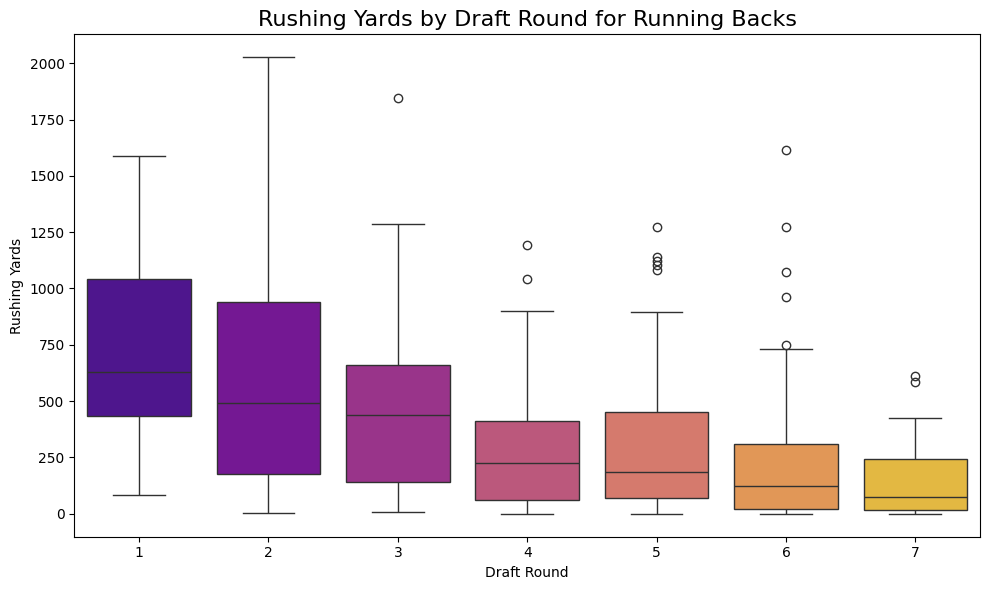

/var/folders/5b/zyfxmg1n27sc10rqxm40tr3r0000gn/T/ipykernel_28042/2764274017.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


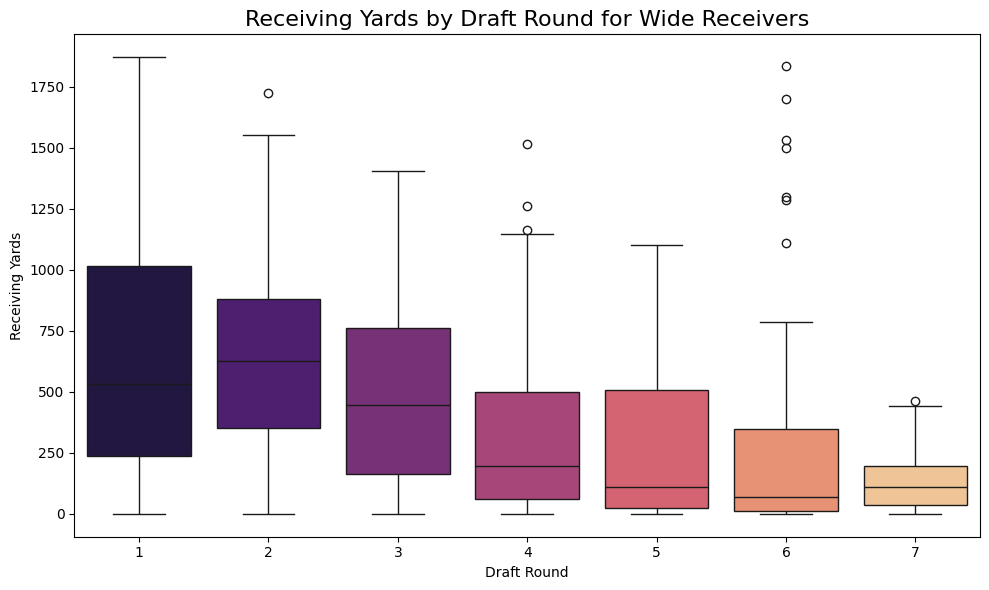

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Round',
    y='rush_yds',
    data=merged_df[merged_df['POS'] == 'RB'],
    palette='plasma'
)
plt.title('Rushing Yards by Draft Round for Running Backs', fontsize=16)
plt.xlabel('Draft Round')
plt.ylabel('Rushing Yards')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Round',
    y='rec_yds',
    data=merged_df[merged_df['POS'] == 'WR'],
    palette='magma'
)
plt.title('Receiving Yards by Draft Round for Wide Receivers', fontsize=16)
plt.xlabel('Draft Round')
plt.ylabel('Receiving Yards')
plt.tight_layout()
plt.show()


/var/folders/5b/zyfxmg1n27sc10rqxm40tr3r0000gn/T/ipykernel_28042/1505709824.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pick_by_team.index, y=avg_pick_by_team.values, palette='viridis')


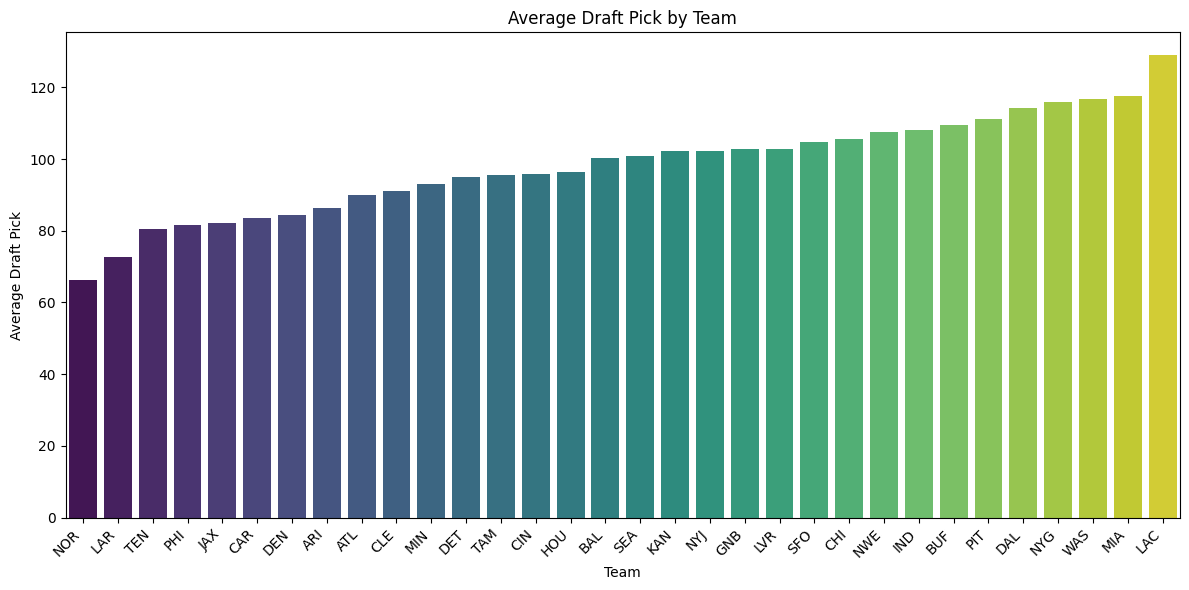

In [36]:
plt.figure(figsize=(12, 6))
avg_pick_by_team = merged_df.groupby('Team')['Pick'].mean().sort_values()
sns.barplot(x=avg_pick_by_team.index, y=avg_pick_by_team.values, palette='viridis')
plt.title('Average Draft Pick by Team')
plt.xlabel('Team')
plt.ylabel('Average Draft Pick')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/5b/zyfxmg1n27sc10rqxm40tr3r0000gn/T/ipykernel_28042/1182131094.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_colleges.index, y=top_colleges.values, palette='plasma')


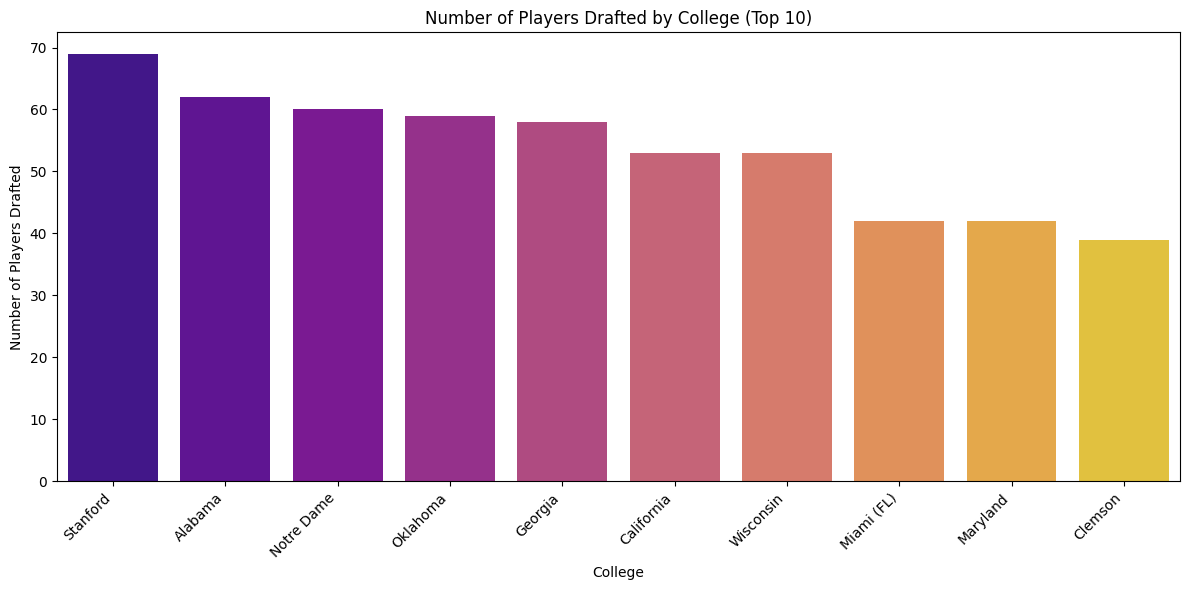

In [37]:
plt.figure(figsize=(12, 6))

top_colleges = merged_df['School'].value_counts().nlargest(10)

sns.barplot(x=top_colleges.index, y=top_colleges.values, palette='plasma')
plt.title('Number of Players Drafted by College (Top 10)')
plt.xlabel('College')
plt.ylabel('Number of Players Drafted')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()